In [29]:
#!/usr/bin/env python
"""
Tutorial to demonstrate running parameter estimation on a binary neutron star
system taking into account tidal deformabilities.

This example estimates the masses using a uniform prior in both component masses
and also estimates the tidal deformabilities using a uniform prior in both
tidal deformabilities
"""
#Hello!
# ! git clone -b BinaryLove https://git.ligo.org/cjhaster/bilby.git
import sys
sys.path.insert(0,'/home/marc.penuliar/bilby') 
import bilby
import numpy as np

In [2]:
# Specify the output directory and the name of the simulation.
outdir = "outdir"
label = "BinaryLove_lambdaSymm"
bilby.core.utils.setup_logger(outdir=outdir, label=label)

In [3]:
# Set up a random seed for result reproducibility.  This is optional!
# np.random.seed(88170235)

In [4]:
# import pandas as pd

# data = pd.read_csv(r'C:\Users\Ron\Desktop\products_sold.csv')   
# df = pd.DataFrame(data, columns=['product', 'price'])
# print(df)

In [5]:
# We are going to inject a binary neutron star waveform.  We first establish a
# dictionary of parameters that includes all of the different waveform
# parameters, including masses of the two black holes (mass_1, mass_2),
# aligned spins of both black holes (chi_1, chi_2), etc.
injection_parameters = dict(
    mass_1=1.5,
    mass_2=1.3,
    chi_1=0.02,
    chi_2=0.02,
    luminosity_distance=50.0,
    theta_jn=0.4,
    psi=2.659,
    phase=1.3,
    geocent_time=1126259642.413,
    ra=1.375,
    dec=-1.2108,
    lambda_1=545.21397414, #182.367432516109 was 400 182.367432516109
    lambda_2=1346.68123938, #475.686331754533 was 450 
)

#lambda_1 =545.21397414 #
# lambda_2 =1346.68123938  #

In [6]:

# Set the duration and sampling frequency of the data segment that we're going
# to inject the signal into. For the
# TaylorF2 waveform, we cut the signal close to the isco frequency
duration = 32
sampling_frequency = 4096 #2048 #4096 changed for later. we need faster test runs
start_time = injection_parameters["geocent_time"] + 2 - duration



In [7]:
# Fixed arguments passed into the source model. The analysis starts at 40 Hz.
waveform_arguments = dict(
    waveform_approximant="IMRPhenomPv2_NRTidal", #IMRPhenomPv2_NRTidal
    reference_frequency=50.0,
    minimum_frequency=40.0,
)


In [8]:
# Create the waveform_generator using a LAL Binary Neutron Star source function
waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_binary_neutron_star,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters,
    waveform_arguments=waveform_arguments,
)
##

22:18 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_neutron_star
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters


In [9]:
# Set up interferometers.  In this case we'll use three interferometers
# (LIGO-Hanford (H1), LIGO-Livingston (L1), and Virgo (V1)).
# These default to their design sensitivity and start at 40 Hz.
interferometers = bilby.gw.detector.InterferometerList(["H1", "L1", "V1"])
for interferometer in interferometers:
    interferometer.minimum_frequency = 40
interferometers.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration, start_time=start_time
)
interferometers.inject_signal(
    parameters=injection_parameters, waveform_generator=waveform_generator
)


22:18 bilby INFO    : Injected signal in H1:
22:18 bilby INFO    :   optimal SNR = 34.49
22:18 bilby INFO    :   matched filter SNR = 35.17-0.32j
22:18 bilby INFO    :   mass_1 = 1.5
22:18 bilby INFO    :   mass_2 = 1.3
22:18 bilby INFO    :   chi_1 = 0.02
22:18 bilby INFO    :   chi_2 = 0.02
22:18 bilby INFO    :   luminosity_distance = 50.0
22:18 bilby INFO    :   theta_jn = 0.4
22:18 bilby INFO    :   psi = 2.659
22:18 bilby INFO    :   phase = 1.3
22:18 bilby INFO    :   geocent_time = 1126259642.413
22:18 bilby INFO    :   ra = 1.375
22:18 bilby INFO    :   dec = -1.2108
22:18 bilby INFO    :   lambda_1 = 545.21397414
22:18 bilby INFO    :   lambda_2 = 1346.68123938
22:18 bilby INFO    : Injected signal in L1:
22:18 bilby INFO    :   optimal SNR = 27.92
22:18 bilby INFO    :   matched filter SNR = 27.71+0.03j
22:18 bilby INFO    :   mass_1 = 1.5
22:18 bilby INFO    :   mass_2 = 1.3
22:18 bilby INFO    :   chi_1 = 0.02
22:18 bilby INFO    :   chi_2 = 0.02
22:18 bilby INFO    :   lu

[{'plus': array([ 0.-0.j,  0.-0.j,  0.-0.j, ..., -0.+0.j, -0.+0.j,  0.-0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([ 0.-0.j,  0.-0.j,  0.-0.j, ..., -0.+0.j, -0.+0.j,  0.-0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([ 0.-0.j,  0.-0.j,  0.-0.j, ..., -0.+0.j, -0.+0.j,  0.-0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}]

In [10]:
# Load the default prior for binary neutron stars.
# We're going to sample in chirp_mass, symmetric_mass_ratio, lambda_tilde, and
# delta_lambda rather than mass_1, mass_2, lambda_1, and lambda_2.
# BNS have aligned spins by default, if you want to allow precessing spins
# pass aligned_spin=False to the BNSPriorDict
priors = bilby.gw.prior.BNSPriorDict()
for key in [
    "psi",
    "geocent_time",
    "ra",
    "dec",
    "chi_1",
    "chi_2",
    "theta_jn",
    "luminosity_distance",
    # "phase",
]:
    priors[key] = injection_parameters[key]
del priors["lambda_1"], priors["lambda_2"], priors["mass_ratio"],
priors["chirp_mass"] = bilby.core.prior.Gaussian(
    1.215, 0.1, name="chirp_mass", unit="$M_{\\odot}$"
)
priors["symmetric_mass_ratio"] = bilby.core.prior.Uniform(
    0.1, 0.25, name="symmetric_mass_ratio"
)

#Using this prior will create lambda1 and lambda2. Outputs are funky
priors["lambda_symmetric"] = bilby.core.prior.Uniform(0, 5000, name="lambda_symmetric") 

priors["binary_love_uniform"] = bilby.core.prior.Uniform(0, 1, name="binary_love_uniform")

priors["lambda_1"] = bilby.core.prior.Constraint(name='lambda_1', minimum=0,maximum=10000)
priors["lambda_2"] = bilby.core.prior.Constraint(name='lambda_2', minimum=0,maximum=10000)

priors['phase'] = bilby.core.prior.Uniform(
    0, 2 *np.pi, boundary='periodic', name='phase')
#The next step is to make a larger range for binary love? 


priors["lambda_symmetric"] = bilby.core.prior.Uniform(0, 5000, name="lambda_symmetric") 

priors["lambda_antisymmetric"] = bilby.core.prior.Uniform(-5000, 5000, name="lambda_antisymmetric")




22:18 bilby INFO    : No prior given, using default BNS priors in /home/marc.penuliar/bilby/bilby/gw/prior_files/aligned_spins_bns_tides_on.prior.


In [11]:
# Initialise the likelihood by passing in the interferometer data (IFOs)
# and the waveform generator
likelihood = bilby.gw.GravitationalWaveTransient(
    interferometers=interferometers,
    waveform_generator=waveform_generator,
    phase_marginalization=True,
    priors = priors
)

22:18 bilby INFO    : Running for label 'BinaryLove_lambdaSymm', output will be saved to 'outdir'
22:18 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
22:18 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
22:18 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
22:18 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
22:18 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
22:18 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
22:18 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
22:18 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
22:18 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_redundancy
22:18 bilby INFO    : Performing redundancy check using BBHPriorDict(self).test_red

No version information file '.version' found
it=  2173 logz=1371.810516200000052504760255204420248704468581108159154915854115511802457988908195786371375080447864043704443832883878176942523235360430575644792184786706982848387200926575803737830233794788090059368953234970799945081119038967640880074652742780142494579258788820056842838115669472196386865459400540160.000000


23:29 bilby INFO    : Sampling time: 1:10:38.125078
23:29 bilby INFO    : Reconstructing marginalised parameters.
23:29 bilby INFO    : Cached samples dict out of date, ignoring


  0%|          | 0/2274 [00:00<?, ?it/s]

23:38 bilby INFO    : Generating sky frame parameters.


  0%|          | 0/2274 [00:00<?, ?it/s]

23:38 bilby INFO    : Computing SNRs for every sample.


  0%|          | 0/2274 [00:00<?, ?it/s]

23:56 bilby INFO    : Summary of results:
nsamples: 2274
ln_noise_evidence: -193629.795
ln_evidence: -192257.624 +/-  0.441
ln_bayes_factor: 1372.171 +/-  0.441



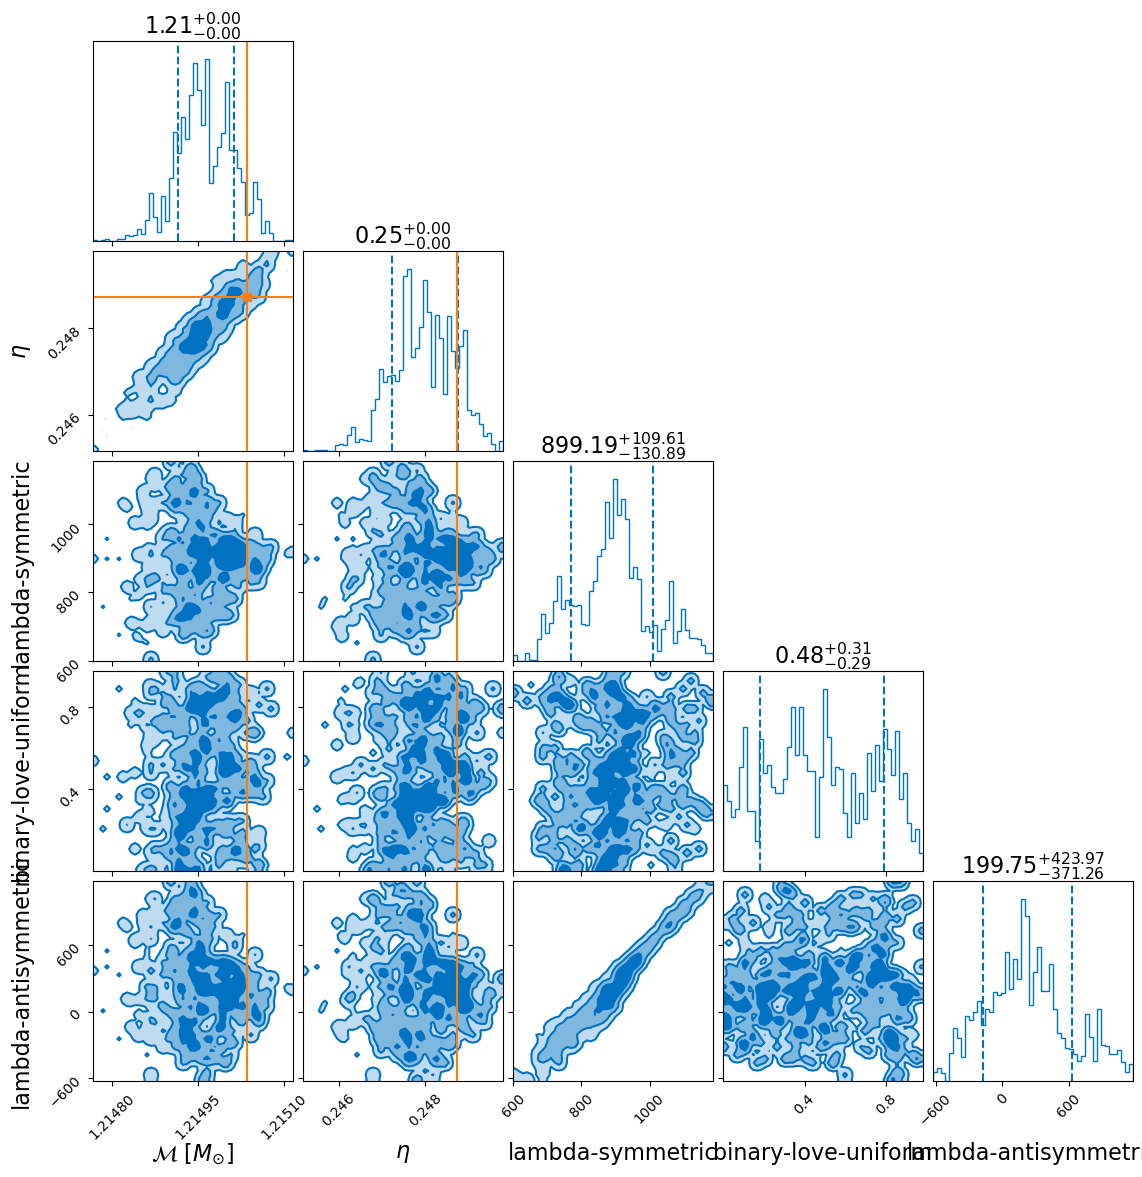

In [12]:

# Run sampler.  In this case we're going to use the `nestle` sampler
result = bilby.run_sampler(
    likelihood=likelihood,
    priors=priors,
    sampler="nestle",
    npoints=100,
    injection_parameters=injection_parameters,
    outdir=outdir,
    label=label,
    conversion_function=bilby.gw.conversion.generate_all_bns_parameters,
)

result.plot_corner()


In [13]:
# import seaborn as sns 
# sns.jointplot( x=result.posterior['lambda_1'], y=result.posterior['lambda_2'],kind = 'kde').fig.suptitle("Bilby_Example_Code")
# sns.title.set(title='hello')

In [72]:
# import seaborn as sns 
# result.posterior['lambda1'] = result.posterior.apply(lambda row :
#         bilby.gw.conversion.binary_love_lambda_symmetric_to_lambda_1_lambda_2_manual_marginalisation(
#                 row['binary_love_uniform'],row['lambda_symmetric'],row['symmetric_mass_ratio']
#                 )[0], axis = 1)

# result.posterior['lambda2'] = result.posterior.apply(lambda row :
#         bilby.gw.conversion.binary_love_lambda_symmetric_to_lambda_1_lambda_2_manual_marginalisation(
#                 row['binary_love_uniform'],row['lambda_symmetric'],row['symmetric_mass_ratio']
#                 )[1], axis = 1)

# sns.jointplot( x=result.posterior['lambda1'], y=result.posterior['lambda2'],kind = 'kde').fig.suptitle("BinaryLove_LambdaSymm")

# # import matplotlib.pyplot as plt
# # #lambda 2 y
# # plt.axhline(y=result.injection_parameters['lambda_2'], color="orange", linestyle="-")
# # #lambda 2 x
# # plt.axvline(x= result.injection_parameters['lambda_1'], color="orange")
# # #Add the point
# # plt.scatter(result.injection_parameters['lambda_1'], result.injection_parameters['lambda_2'],color = 'orange')

# lambda_1=545.21397414, #182.367432516109 was 400 182.367432516109
# lambda_2=1346.68123938


# import matplotlib.pyplot as plt

# #lambda 2 y
# plt.axhline(y= lambda_2 , color="orange", linestyle="-")
# #lambda 1 x
# plt.axvline(x= lambda_1, color="orange")
# #Add the point
# plt.scatter(lambda_1, lambda_2, color = 'orange')

# plt.show()

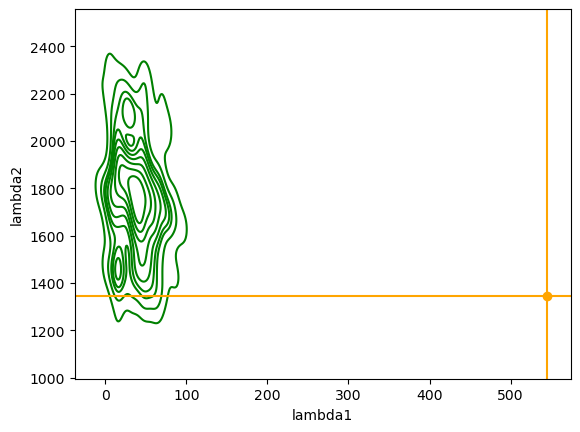

In [15]:
sns.kdeplot( x=result.posterior['lambda1'], y=result.posterior['lambda2'],color = 'green', label='Binary_love_&_LambdaSymm')

lambda_1=545.21397414, #182.367432516109 was 400 182.367432516109
lambda_2=1346.68123938

#lambda 2 y
plt.axhline(y= lambda_2 , color="orange", linestyle="-")
#lambda 1 x
plt.axvline(x= lambda_1, color="orange")
#Add the point
plt.scatter(lambda_1, lambda_2, color = 'orange')

# plt.show()

In [16]:
# Wanted to see if the result of lambda_antisymmetric and lambda_symmetric exists 
print(result.posterior)

      chirp_mass  symmetric_mass_ratio  lambda_symmetric  binary_love_uniform  \
0       1.214787              0.245942        960.848286             0.453724   
1       1.214975              0.249067        925.153969             0.831405   
2       1.214814              0.246117        671.707097             0.366247   
3       1.214766              0.245178        898.702803             0.544833   
4       1.214892              0.246511        757.999979             0.220637   
...          ...                   ...               ...                  ...   
2269    1.215039              0.249187        936.363651             0.535749   
2270    1.215039              0.249187        936.363651             0.535749   
2271    1.215039              0.249187        936.363651             0.535749   
2272    1.215039              0.249187        936.363651             0.535749   
2273    1.215039              0.249187        936.363651             0.535749   

      lambda_antisymmetric 

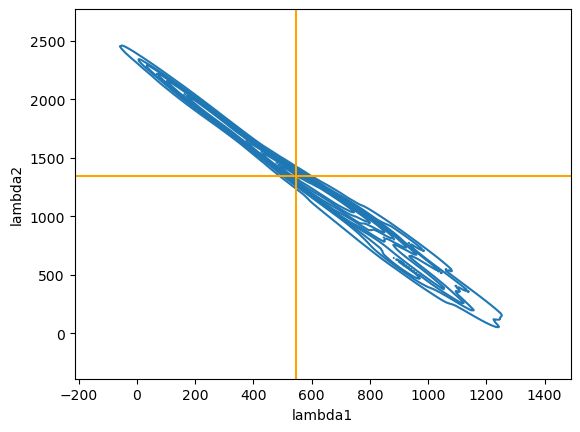

In [17]:
#plot of lambda1 and lambda2 created from the posterior samples of lambdaSymm and lambdaAntisymm

result.posterior['lambda1'] = result.posterior.apply(lambda row :
        bilby.gw.conversion.lambda_symmetric_lambda_antisymmetric_to_lambda_1_lambda_2(
                row['lambda_symmetric'],row['lambda_antisymmetric']
                )[0], axis = 1)

result.posterior['lambda2'] = result.posterior.apply(lambda row :
        bilby.gw.conversion.lambda_symmetric_lambda_antisymmetric_to_lambda_1_lambda_2(
                row['lambda_symmetric'],row['lambda_antisymmetric']
                )[1], axis = 1)


# lambda_symmetric_lambda_antisymmetric_to_lambda_1_lambda_2(lambda_symmetric, lambda_antisymmetric)

# priors["lambda_symmetric"] = bilby.core.prior.Uniform(0, 5000, name="lambda_symmetric") 

# priors["lambda_antisymmetric"] = bilby.core.prior.Uniform(-5000, 5000, name="lambda_antisymmetric")


# sns.jointplot( x=result.posterior['lambda1'], y=result.posterior['lambda2'],kind = 'kde').fig.suptitle("lambdaAsymm_lambdaSymm")
sns.kdeplot( x=result.posterior['lambda1'], y=result.posterior['lambda2'])


#lambda 2 y
plt.axhline(y=result.injection_parameters['lambda_2'], color="orange", linestyle="-")
#lambda 2 x
plt.axvline(x= result.injection_parameters['lambda_1'], color="orange")
#Add the point
plt.scatter(result.injection_parameters['lambda_1'], result.injection_parameters['lambda_2'],color = 'orange')

In [70]:
injection_lambda_1 = result.injection_parameters['lambda_1']
injection_lambda_2 = result.injection_parameters['lambda_2']

true_value_lambdaASymm = bilby.gw.conversion.lambda_1_lambda_2_to_lambda_antisymmetric(injection_lambda_1, injection_lambda_2) 
print(true_value_lambdaASymm)

400.73363262000004


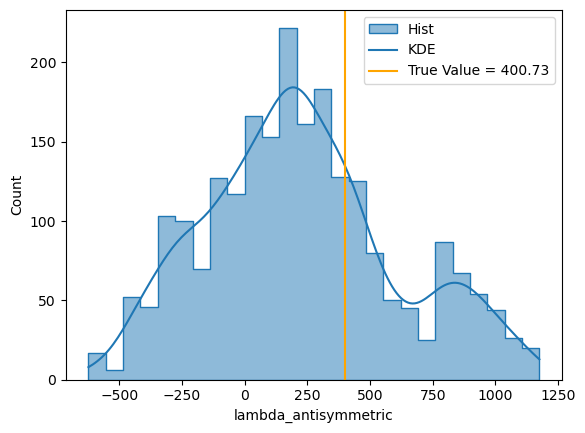

In [71]:
sns.histplot(x = result.posterior['lambda_antisymmetric'],kde = True , element="step").axvline(true_value_lambdaASymm, color ='orange' )
plt.legend(labels=["Hist","KDE", 'True Value = 400.73'])
plt.show ()